# 04-1 로지스틱 회귀
#### 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측합니다.

## 럭키백의 확률
- 럭키백에 포함된 생선의 확률을 알려주는 방향으로 한 이벤트
  - 7개의 생선 종류를 맞추는 이벤트

In [2]:
# 데이터 준비하기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [3]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [4]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()

- to_numpy 메서드로 넘파이 배열로 변경하여 fish_input에 저장

In [6]:
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


In [5]:
fish_target = fish['Species'].to_numpy()

In [7]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [8]:
# StandardScaler 클래스를 사용해 훈련 세트와 테스트 세트를 표준화 전처리
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## k-최근접 이웃 분류기의 확률 예측
- k=3으로 지정후 모델 예측

In [9]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 주의할 점은 타깃값을 그댈 모델에 전달하면 순서가 자동으로 알파벳 순으로 매겨짐
- pd.unique(fish['Species'])로 출력했던 순서와 다름
- KNeighborsClassifier에서 정렬된 타깃값은 classes_속성에 저장

In [10]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [11]:
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [12]:
import numpy as np 
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [13]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## 로지스틱 회귀
- 이름은 회귀이지만 분류 모델임
- 선형 회귀와 동일하게 선형 방정식을 학습
- 시그모이드 함수(로지스틱 함수)를 사용하여 0.5 이상과 이하를 분류
- z가 무한하게 큰 음수일 경우 이 함수는 0에 가까워지고 반대는 1에 가까워 짐. z가 0일때는 0.5가 됨
- 넘파이로 간단하게 그래프를 그릴 수 있음

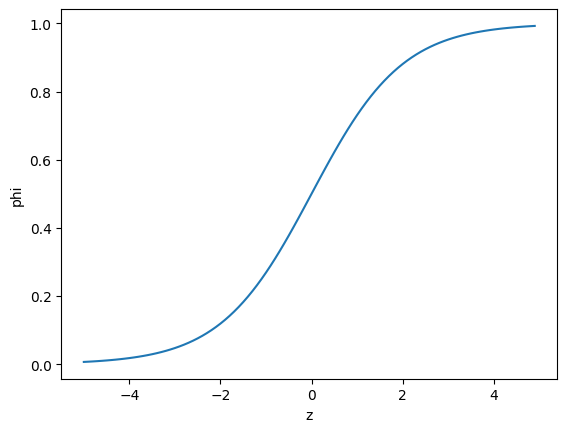

In [14]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))

plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

## 로지스틱 회귀로 이진 분류 수행하기
- 넘파이 배열은 True, False 값을 전달하여 행을 선택 가능 -> 이를 불리언 인덱싱이라 부름
- A~E까지 5개로 이루어진 원소 배열 중 A, C만 골라내려면 그 값만 True로 배열을 전달

In [15]:
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [16]:
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [18]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [19]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]


In [20]:
print(lr.classes_)

['Bream' 'Smelt']


In [21]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z 값을 시그모이드 함수에 통과시키면 확률을 얻을 수 있음

In [22]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [23]:
from scipy.special import expit

print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 이진 분류의 경험을 바탕으로 7개 생선을 분류하는 다중 분류 문제로 넘어가봐요

### 로지스틱 회귀로 다중 분류 수행하기

- LogisticRegression 클래스는 반복 알고리즘을 사용
- max_iter 매개변수에서 반복 횟수 지정하며 기본값은 100 -> 충분한 훈련을 위해 1000으로 늘림
- LogisticRegression은 기본적으로 릿지 회귀와 같이 계수의 제곱을 규졔 (L2 규제라고도 함)
- alpha가 커지면 규제도 커짐. LogisticRegression에서 규제를 제어하는 매개변수는 C, 하지만 C는 alpha와 반대로 작을수록 규제가 커짐. C 기본값은 1 -> 20으로 늘려볼게요

In [24]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [25]:
# 훈련셋과 테스트셋에 대한 점수가 높고 과대적합, 과소적합으로 치우친 것 같지 않습니다.
# 테스트 세트의 처음 5개 샘플에 대한 예측을 출력

print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [26]:
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [27]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [28]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- z를 7개나 계산한다는 의미. 다중 분류는 클래스마다 z값을 하나씩 계산함
- 가장 높은 z 값을 출력하는 클래스가 예측 클래스가 됨. 확률은 어떻게 계산한 것일까
- 이진 분류에서는 시그모이드 함수를 사용해 z를 0과 1사이의 값으로 변환
- 다중 분류는 이와 달리 소프트맥스 함수를 사용해 7개의 z값을 확률로 변환

In [29]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [30]:
from scipy.special import softmax

proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


## 로지스틱 회귀로 확률 예측
- 로지스틱 회귀는 **분류모델**입니다
- 선형 회귀 처럼 선형 방정식을 사용합니다.
- 로지스틱회귀는 결과값을 0~1 사이로 압축합니다.
- 다음절에서는 인기가 높고 성능이 뛰어난 또 다른 머신러닝 알고리즘인 확률적 경사 하강법에 대해 배워보겠습니다.

# 04-2 확률적 경사 하강법
#### 경사하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배웁니다. 

## 점진적인 학습
- 훈련 데이터가 조금씩 전달된다는 것이 문제
- 도착하는대로 생선을 판매해야하므로 데이터가 쌓일 때까지 기다릴 수 없음
- 시간이 지날수록 데이터가 늘어남
- 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 더 훈련할 수 있을까? 이렇게 할 수 있다면 훈련에 사용한 데이터를 모두 유지할 필요도 없고 앞서 학습한 생선을 까먹을 일도 없음
- 이런 학습법을 **점진적 학습 or 온라인 학습**이라고 부름. 대표적인 알고리즘은 확률적 경사 학습법.

### 확률적 경사 학습법
- '무작위하게', '랜덤하게'의 기술적 표현
- 경사하강법은 경사를 따라 내려가는 방법을 말함
- 가장 빨리 내려가는 방법은 경사가 가장 가파른 길!
- 훈련 새트에서 랜덤하게 하나의 샘플을 고르는 것이 **확률적 경사 하강법**임
- 산을 내려가지 못했다면 처음부터 다시 시작!
- 만족할만한 위치에 도달할떄까지 반복.
- 확률적 경사 하강법에서 훈련 세트를 한 번 모두 사용하는 과정을 에포크(epoch)라고 부름
- 일반적으로 경사 하강법은 수십, 수백 번 이상 에포크를 수행

- 여러개의 샘플을 사용해 경사 하강법을 수행 -> 미니배치 경사 하강법
  - 전체 데이터를 사용하기 때문에 자원을 많이 사용함
 
- https://alltommysworks.com/%EA%B2%BD%EC%82%AC-%ED%95%98%EA%B0%95%EB%B2%95/
 
### 손실 함수(loss function)
- 어떤 문제에서 머신러닝 알고리즘이 얼마나 엉터리인지 측정하는 기준, 손실 함수의 값이 적을수록 좋음 but, 어떤 값이 최소값인지는 모름
- 손실 함수와 비용 함수 : 비용 함수(cost function) -> 손실 함수는 샘플 하나에 대한 손실을 정의하고 비용 함수는 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합을 말합니다.
  - 하지만 보통 이 둘을 엄격히 구분하지 않고 섞어서 사요합니다.

- 분류에서 손실은 확실 : 오답
  - 하지만 경사 하강법을 사용할 때 연속된 값에서의 손실 함수를 사용해야 함

### 로지스틱 손실 함수 (이진 엔트로피 손실 함수)
- 이해를 못했지만 머신러닝 라이브러리가 처리해주니까 걱정할 필요가 없다고합니다.(책에서 ..)


## SGDClassifier

In [31]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')

In [32]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [33]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [35]:
from sklearn.linear_model import SGDClassifier

In [36]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/Users/jeremy/.pyenv/versions/3.11.3/envs/hongong/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [37]:
sc.partial_fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


### 에포크와 과대적합 / 과소적합

In [38]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [39]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

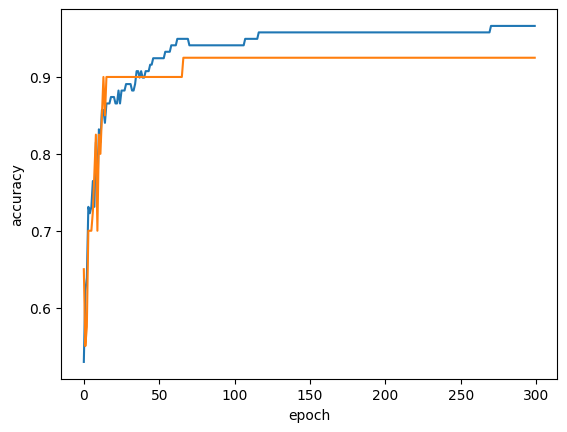

In [40]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [41]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [42]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925
